In [1]:
import urllib
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../data/PlantGrowth.csv')
print(df.shape)
df.head()

(30, 2)


,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


- 균형설계자료인지 확인

In [16]:
df.groupby('group').agg(len)

,weight
group,
ctrl,10.0
trt1,10.0
trt2,10.0


In [20]:
df['group'].unique()

array(['ctrl', 'trt1', 'trt2'], dtype=object)

- independent variable : group , dependent variable : weight

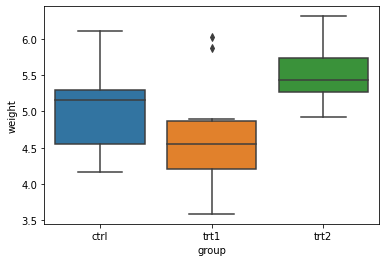

In [58]:
sns.boxplot(x='group', y='weight', data=df)
plt.show()

## statsmodels로 분산분석 수행

In [59]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('weight ~ C(group)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(group),2.0,3.76634,1.883170,4.846088,0.01591
Residual,27.0,10.49209,0.388596,NaN,NaN


In [88]:
1.883170/0.388596

4.846086938620058

## scipy.stats으로 일원분산분석

In [81]:
vals = [df[df['group'] == df['group'].unique()[i]]['weight'].values for i in range(3)]

In [87]:
F_statistics, pVal = stats.f_oneway(vals[0],vals[1],vals[2])
print('치료제 데이터 일원분산분석 결과 : F={0:.3f}, p={1:.5f}'.format(F_statistics, pVal))
if pVal < 0.05:
    print('p-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이가 남')

치료제 데이터 일원분산분석 결과 : F=4.846, p=0.01591
p-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이가 남


## cf.분산의 중요성 확인

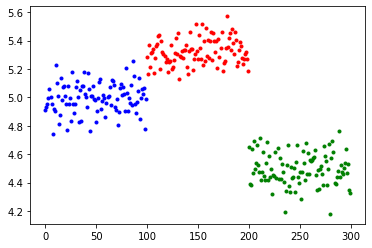

In [89]:
centers = [5,5.3,4.5]
std = 0.1
colors = 'brg'

data_1=[]
for i in range(3):
    data_1.append(stats.norm(centers[i], std).rvs(100))
    plt.plot(np.arange(len(data_1[i]))+i*len(data_1[0]),data_1[i], '.', color=colors[i])

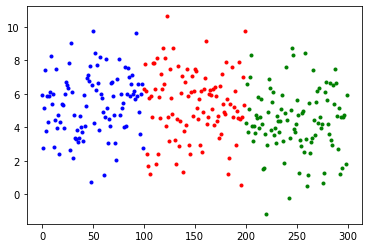

In [29]:
std_2 = 2
data_2 = []
for i in range(3):
    data_2.append(stats.norm(centers[i], std_2).rvs(100))
    plt.plot(np.arange(len(data_1[i]))+i*len(data_2[0]), data_2[i],'.',color=colors[i])

- 분산이 클수록 집단의 평균값의 차이가 무의미해짐